In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [6]:
import seaborn as sms

In [ ]:
import matplotlib.patches as patches

In [8]:
mpg = pd.read_csv('mpg.csv')

In [10]:
mpg.head

<bound method NDFrame.head of     manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    comp

In [12]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [16]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


# prepare data

In [20]:
x_var = 'manufacturer'
groupby_var = 'class'
mpg_agg = mpg.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [mpg[x_var].values.tolist() for i, mpg in mpg_agg]

# Draw plot

ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of labels (15).

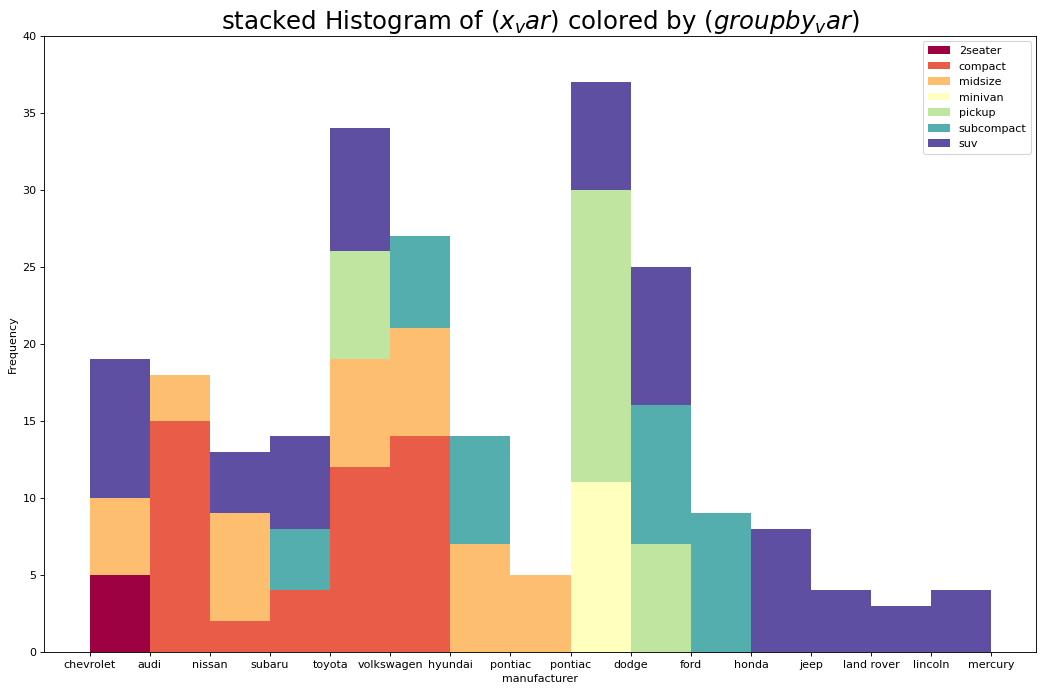

In [24]:
plt.figure(figsize = (16,10), dpi = 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range (len(vals))]
n, bins, patches = plt.hist(vals, mpg[x_var].unique().__len__(), stacked = True, density = False, color = colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(mpg[groupby_var]).tolist(),colors[:len(vals)])})
plt.title(f"stacked Histogram of $(x_var)$ colored by $(groupby_var)$", fontsize = 22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks = bins, labels = np.unique(mpg[x_var]).tolist(), rotation = 90, horizontalalignment = 'left')
plt.show()